# Activity: Explore probability distributions

## **Introduction**

The ability to determine which type of probability distribution best fits data, calculate z-score, and detect outliers are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

In this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports** 

Import relevant libraries, packages, and modules. For this lab, you will need `numpy`, `pandas`, `matplotlib.pyplot`, `statsmodels.api`, and `scipy`.

In [1]:
# Import relevant libraries, packages, and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

A subset of data was taken from the air quality data collected by the EPA, then transformed to suit the purposes of this lab. This subset is a .csv file named `modified_c4_epa_air_quality.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.
data = pd.read_csv("modified_c4_epa_air_quality.csv")

## **Step 2: Data exploration** 

Display the first 10 rows of the data to get a sense of how the data is structured.

In [3]:
# Display first 10 rows of the data.
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this lab. Taking a logarithm of the aqi to get a bell-shaped distribution is outside the scope of this course, but is helpful to see the normal distribution.

To better understand the quantity of data you are working with, display the number of rows and the number of columns.

In [6]:
# Display number of rows, number of columns.
#data.info()
data.shape

(260, 8)

Now, you want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

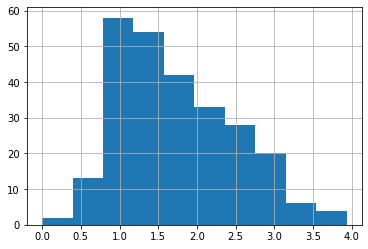

In [8]:
# Create a histogram to visualize distribution of aqi_log.
data['aqi_log'].hist()

## **Step 3: Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed.


 As you have learned, the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


First, define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule. 

In [20]:
# Define variable for aqi_log mean.
aqi_mean = data['aqi_log'].mean()
print(f"mean: {aqi_mean:.2f}")

# Define variable for aqi_log standard deviation.
aqi_std = data['aqi_log'].std()
print(f"standard deviation: {aqi_std:.2f}")

# Define variable for lower limit, 1 standard deviation below the mean.
lower_limit = aqi_mean -1  *aqi_std 
print(f"lower limit,1 standard deviation below the mean : {lower_limit:.4f}")

# Define variable for upper limit, 1 standard deviation above the mean.
upper_limit = aqi_mean +1 *aqi_std
print(f"upper limit, 1 standard deviation above the mean.: {upper_limit:.4f}")

# Display the actual percentage of data that falls within 1 standard deviation of the mean.
percentage_68= ((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100
print(f"68% of the data fall with:{percentage_68:.2f}%")

mean: 1.77
standard deviation: 0.71
lower limit,1 standard deviation below the mean : 1.0522
upper limit, 1 standard deviation above the mean.: 2.4816
68% of the data fall with:76.15%


In [22]:
# Define variable for lower limit, 2 standard deviations below the mean.
lower_limit2 = aqi_mean -2  *aqi_std 
print(f"lower limit,2 standard deviation below the mean : {lower_limit2:.4f}")

# Define variable for upper limit, 2 standard deviations below the mean.
upper_limit2= aqi_mean +2 *aqi_std
print(f"upper limit, 2 standar deviation above the mean: {upper_limit2:.4f}")

# Display the actual percentage of data that falls within 2 standard deviations of the mean.
percentage_95= ((data["aqi_log"] >= lower_limit2) & (data["aqi_log"] <= upper_limit2)).mean() * 100
print(f"95% of the data fall with:{percentage_95:.2f}%")

lower limit,2 standard deviation below the mean : 0.3375
upper limit, 2 standar deviation above the mean: 3.1964
95% of the data fall with:95.77%


In [23]:
# Define variable for lower limit, 3 standard deviations below the mean.
lower_limit3 = aqi_mean -3  *aqi_std 
print(f"lower limit,3 standard deviation below the mean : {lower_limit3:.4f}")

# Define variable for upper limit, 3 standard deviations above the mean.
upper_limit3= aqi_mean +3 *aqi_std
print(f"upper limit, 3 standar deviation above the mean: {upper_limit3:.4f}")

# Display data where `aqi_log` is above or below 3 standard deviations of the mean
percentage_99= ((data["aqi_log"] >= lower_limit3) & (data["aqi_log"] <= upper_limit3)).mean() * 100
print(f"99.7% of the data fall with:{percentage_99:.2f}%")

lower limit,3 standard deviation below the mean : -0.3772
upper limit, 3 standar deviation above the mean: 3.9111
99.7% of the data fall with:99.62%


## **Step 4: Results and evaluation** 

Compute the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results. 

In [25]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
data['z_score']= stats.zscore(data['aqi_log'])

# Display the first 5 rows to ensure that the new column was added.
data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.438109
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034820
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.936873
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.533584
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.533584


**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 